In [1]:
import sys,os
import numpy as np
import tensorflow as tf
#import matplotlib
#matplotlib.use('TkAgg')
#%matplotlib qt

import matplotlib.pyplot as plt
import time
#%matplotlib inline
from scipy.signal import savgol_filter


/Users/jannisborn/anaconda3/envs/tf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Measure distances of embeddings 

In [2]:
import tensorflow as tf
def retrieve_feature_vector(mode, epochs, path, model_name, task):
		"""
		Helper method that retrieves the input/output embedding vectors of the reading or writing model. Returns to plot_pca or plot_tsne method.

		Parameters:
		-------------
		MODE 			{string} either 'input' or 'output' describing which embedding vector should be retrieved

		ReturnsL
		-------------
		WEIGHT_VECTOR 	{np.array} of shape dict_size x embedding_dimension
		"""

		
		with tf.Session() as sess:

			# Restore model
			saver = tf.train.import_meta_graph(path+'/my_test_model-'+str(epochs)+'.meta')
			saver.restore(sess,path+'/my_test_model-'+str(epochs))
			graph = tf.get_default_graph()


			# Define variable to restore
			if task == 'write' and mode == 'input':
				plotted = 'phonetic'
				enc = 'enc'
			elif task == 'write' and mode == 'output':
				plotted = 'orthographic'
				enc = 'dec'
			elif task == 'read' and mode == 'input':
				plotted = 'orthographic'
				enc = 'enc'
			elif task == 'read' and mode == 'output':
				plotted = 'phonetic'
				enc = 'dec'

			variable_path = model_name + '/' + enc + 'oding_' + task + '/'+enc+'_embedding:0'


			# Load data and perform PCA
			weight_vectors = sess.run(graph.get_tensor_by_name(variable_path))

		return weight_vectors

In [64]:
# Load embeddings
epochs = 125
path = '/Users/jannisborn/Desktop/LDS_Data/TrainedModels/CELEX/lds_run_2'
task = 'write'
mode = 'output'
model_name = 'writing'
lds_feat = retrieve_feature_vector(mode, epochs, path, model_name, task)

path = '/Users/jannisborn/Desktop/LDS_Data/TrainedModels/CELEX/normal_run_1'
epochs = 125
reg_feat = retrieve_feature_vector(mode, epochs, path, model_name, task)

# Load dict
root_local = os.path.expanduser("~")+'/Desktop/LDS_Data/'
path = root_local + 'data/'
dataset = 'CELEX'
data = np.load(path + dataset + '.npz')
input_dict = {key:data['phon_dict'].item().get(key) for key in data['phon_dict'].item()} if task == 'write' else {key:data['word_dict'].item().get(key) for key in data['word_dict'].item()}
output_dict = {key:data['word_dict'].item().get(key) for key in data['word_dict'].item()} if task == 'write' else  {key:data['phon_dict'].item().get(key) for key in data['phon_dict'].item()}
input_dict_rev = dict(zip(input_dict.values(), input_dict.keys()))
output_dict_rev = dict(zip(output_dict.values(), output_dict.keys()))

INFO:tensorflow:Restoring parameters from /Users/jannisborn/Desktop/LDS_Data/TrainedModels/CELEX/lds_run_2/my_test_model-125
INFO:tensorflow:Restoring parameters from /Users/jannisborn/Desktop/LDS_Data/TrainedModels/CELEX/normal_run_1/my_test_model-125


In [12]:
print(output_dict_rev)
print(lds_feat.shape)

{1: 'ö', 2: 'b', 3: 'p', 4: 'w', 5: 's', 6: 'ä', 7: 'v', 8: 'i', 9: ' ', 10: 'ü', 11: 'r', 12: 'k', 13: 'd', 14: 'z', 15: 'f', 16: 'x', 17: 'a', 18: 'l', 19: 'h', 20: 'y', 21: 'q', 22: 'c', 23: 'e', 24: 'm', 25: 'g', 26: 't', 27: 'o', 28: 'n', 29: 'u', 30: 'j', 31: '<GO>', 32: '<PAD>'}
(33, 96)


In [52]:
# ä has index 6 and e index 23, lets measure distance
print("LdS dist of <e> and <ä> is ", np.linalg.norm(lds_feat[6] - lds_feat[23]))
print("Regular dist of <e> and <ä> is ", np.linalg.norm(reg_feat[6] - reg_feat[23]))
# d has index 13 and t index 26, lets measure distance
print("LdS dist of <d> and <t> is ", np.linalg.norm(lds_feat[13] - lds_feat[26]))
print("Regular dist of <d> and <t> is ", np.linalg.norm(reg_feat[13] - reg_feat[26]))

# v has index 7 and w index 4, lets measure distance
print("LdS dist of <v> and <w> is ", np.linalg.norm(lds_feat[7] - lds_feat[4]))
print("Regular dist of <d> and <t> is ", np.linalg.norm(reg_feat[7] - reg_feat[4]))

LdS dist of <e> and <ä> is  8.897102
Regular dist of <e> and <ä> is  8.477949
LdS dist of <d> and <t> is  8.705797
Regular dist of <d> and <t> is  8.015378
LdS dist of <v> and <w> is  10.992191
Regular dist of <d> and <t> is  10.087351


In [69]:
# Try to work with the PCA/t-SNE values:
p = '/Users/jannisborn/Desktop/LDS_Data/TrainedModels/CELEX/lds_run_2/evaluation/PCA_writing_module_orthographic_120embedding_vectors.npz'
lds_pca = np.load(p)
p = '/Users/jannisborn/Desktop/LDS_Data/TrainedModels/CELEX/lds_run_2/evaluation/tSNE_writing_module_orthographic_embedding-vec_epoch120_perp=10_step=5000_lr=10_ang=0.5_init=random_pca=None.npy'
lds_tsne = np.load(p)
p = '/Users/jannisborn/Desktop/LDS_Data/TrainedModels/CELEX/normal_run_1/evaluation/PCA\ writing\ module\ orthographic_125embedding\ vectors.npz'
reg_pca = np.load(p.replace('\\', ''))
p = '/Users/jannisborn/Desktop/LDS_Data/TrainedModels/CELEX/normal_run_1/evaluation/tSNE_writing_module_orthographic_embedding-vec_epoch125_perp=10_step=5000_lr=10_ang=0.5_init=random_pca=None.npy'
reg_tsne = np.load(p)



In [53]:
# PCA Results
# ä has index 6 and e index 23, lets measure distance
print("LdS dist of <e> and <ä> is ", np.linalg.norm(lds_pca['pcs'][6] - lds_pca['pcs'][23]))
print("Regular dist of <e> and <ä> is ", np.linalg.norm(reg_pca['pcs'][6] - reg_pca['pcs'][23]))
# d has index 13 and t index 26, lets measure distance
print("LdS dist of <d> and <t> is ", np.linalg.norm(lds_pca['pcs'][13] - lds_pca['pcs'][26]))
print("Regular dist of <d> and <t> is ", np.linalg.norm(reg_pca['pcs'][13] - reg_pca['pcs'][26]))

# v has index 7 and w index 4, lets measure distance
print("LdS dist of <v> and <w> is ", np.linalg.norm(lds_pca['pcs'][7] - lds_pca['pcs'][4]))
print("Regular dist of <d> and <t> is ", np.linalg.norm(reg_pca['pcs'][7] - reg_pca['pcs'][4]))

LdS dist of <e> and <ä> is  0.9554586
Regular dist of <e> and <ä> is  1.3152292
LdS dist of <d> and <t> is  0.1609905
Regular dist of <d> and <t> is  0.8957248
LdS dist of <v> and <w> is  0.7808976
Regular dist of <d> and <t> is  0.76860267


In [54]:
# tSNE results
# ä has index 6 and e index 23, lets measure distance
print("LdS dist of <e> and <ä> is ", np.linalg.norm(lds_tsne[6] - lds_tsne[23]))
print("Regular dist of <e> and <ä> is ", np.linalg.norm(reg_tsne[6] - reg_tsne[23]))
# d has index 13 and t index 26, lets measure distance
print("LdS dist of <d> and <t> is ", np.linalg.norm(lds_tsne[13] - lds_tsne[26]))
print("Regular dist of <d> and <t> is ", np.linalg.norm(reg_tsne[13] - reg_tsne[26]))

# v has index 7 and w index 4, lets measure distance
print("LdS dist of <v> and <w> is ", np.linalg.norm(lds_tsne[7] - lds_tsne[4]))
print("Regular dist of <d> and <t> is ", np.linalg.norm(reg_tsne[7] - reg_tsne[4]))

LdS dist of <e> and <ä> is  1.6692604
Regular dist of <e> and <ä> is  1.2646354
LdS dist of <d> and <t> is  0.9848242
Regular dist of <d> and <t> is  0.8077428
LdS dist of <v> and <w> is  1.3629563
Regular dist of <d> and <t> is  3.5519953


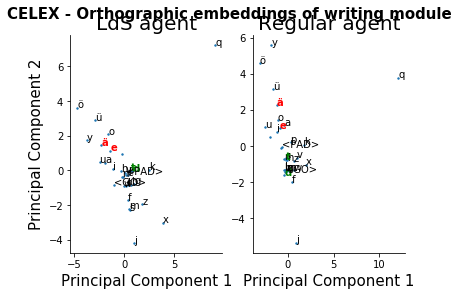

In [88]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.suptitle("CELEX - Orthographic embeddings of writing module ", fontsize=15, weight='bold' )

ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title("LdS agent", fontsize = 20)
ax1.scatter(lds_pca['pcs'][:,0], lds_pca['pcs'][:,1],s=2)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

for k in range(1,len(lds_pca['pcs'])):
    if k == 6 or k == 23:
        ax1.annotate(output_dict_rev[k],(lds_pca['pcs'][k,0], lds_pca['pcs'][k,1]), weight='bold', color='red')  
    elif  k ==13 or k == 26:
        ax1.annotate(output_dict_rev[k],(lds_pca['pcs'][k,0], lds_pca['pcs'][k,1]), weight='bold', color='green')  
    else:
        ax1.annotate(output_dict_rev[k],(lds_pca['pcs'][k,0], lds_pca['pcs'][k,1]))  

ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_title("Regular agent", fontsize = 20)
ax2.scatter(reg_pca['pcs'][:,0], reg_pca['pcs'][:,1],s=2)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

for k in range(1,len(reg_pca['pcs'])):
    if k == 6 or k == 23:
        ax2.annotate(output_dict_rev[k],(reg_pca['pcs'][k,0], reg_pca['pcs'][k,1]),weight='bold', color='red')  
    elif k ==13 or k == 26:
        ax2.annotate(output_dict_rev[k],(reg_pca['pcs'][k,0], reg_pca['pcs'][k,1]), weight='bold', color='green')  
    else:
        ax2.annotate(output_dict_rev[k],(reg_pca['pcs'][k,0], reg_pca['pcs'][k,1]))  
fig.savefig("foo.pdf", bbox_inches='tight')

# PHONETIC EMBEDDINGS

In [55]:
# Load embeddings
epochs = 125
path = '/Users/jannisborn/Desktop/LDS_Data/TrainedModels/CELEX/lds_run_2'
task = 'write'
mode = 'input'
model_name = 'writing'
lds_feat = retrieve_feature_vector(mode, epochs, path, model_name, task)

path = '/Users/jannisborn/Desktop/LDS_Data/TrainedModels/CELEX/normal_run_1'
epochs = 125
reg_feat = retrieve_feature_vector(mode, epochs, path, model_name, task)

# Load dict
root_local = os.path.expanduser("~")+'/Desktop/LDS_Data/'
path = root_local + 'data/'
dataset = 'CELEX'
data = np.load(path + dataset + '.npz')
input_dict = {key:data['phon_dict'].item().get(key) for key in data['phon_dict'].item()} if task == 'write' else {key:data['word_dict'].item().get(key) for key in data['word_dict'].item()}
output_dict = {key:data['word_dict'].item().get(key) for key in data['word_dict'].item()} if task == 'write' else  {key:data['phon_dict'].item().get(key) for key in data['phon_dict'].item()}
input_dict_rev = dict(zip(input_dict.values(), input_dict.keys()))
output_dict_rev = dict(zip(output_dict.values(), output_dict.keys()))

INFO:tensorflow:Restoring parameters from /Users/jannisborn/Desktop/LDS_Data/TrainedModels/CELEX/lds_run_2/my_test_model-125
INFO:tensorflow:Restoring parameters from /Users/jannisborn/Desktop/LDS_Data/TrainedModels/CELEX/normal_run_1/my_test_model-125


In [57]:
print(input_dict_rev)
print(lds_feat.shape)

{1: 'œ', 2: 'ɪ', 3: 'ɛ', 4: 'ɐ', 5: 'p', 6: 'b', 7: 'w', 8: 's', 9: 'v', 10: 'i', 11: 'ə', 12: ' ', 13: 'r', 14: 'k', 15: 'ç', 16: 'ʒ', 17: 'd', 18: 'ɜ', 19: 'z', 20: 'ɡ', 21: 'f', 22: 'ɾ', 23: 'x', 24: 'a', 25: 'l', 26: 'ˌ', 27: 'h', 28: 'ɔ', 29: 'ʃ', 30: 'y', 31: 'ŋ', 32: 'ʊ', 33: 'e', 34: 'ː', 35: 'm', 36: 'ɑ', 37: 'ˈ', 38: 't', 39: 'o', 40: 'n', 41: 'u', 42: 'j', 43: 'ø', 44: 'ʏ', 45: '<GO>', 46: '<PAD>'}
(47, 96)


In [58]:
# e has index 33 and ɛ index 3, lets measure distance
print("LdS dist of <e> and <ä> is ", np.linalg.norm(lds_feat[33] - lds_feat[3]))
print("Regular dist of <e> and <ä> is ", np.linalg.norm(reg_feat[33] - reg_feat[3]))
# d has index 17 and t index 38, lets measure distance
print("LdS dist of <d> and <t> is ", np.linalg.norm(lds_feat[17] - lds_feat[38]))
print("Regular dist of <d> and <t> is ", np.linalg.norm(reg_feat[17] - reg_feat[38]))

# v has index 9 and f index 21, lets measure distance
print("LdS dist of <v> and <w> is ", np.linalg.norm(lds_feat[9] - lds_feat[21]))
print("Regular dist of <d> and <t> is ", np.linalg.norm(reg_feat[9] - reg_feat[21]))

LdS dist of <e> and <ä> is  4.1596847
Regular dist of <e> and <ä> is  3.8709877
LdS dist of <d> and <t> is  6.4310966
Regular dist of <d> and <t> is  5.421016
LdS dist of <v> and <w> is  6.069377
Regular dist of <d> and <t> is  4.1154523


In [60]:
# Try to work with the PCA/t-SNE values:
p = '/Users/jannisborn/Desktop/LDS_Data/TrainedModels/CELEX/lds_run_2/evaluation/PCA_writing_module_phonetic_125embedding_vectors.npz'
lds_pca = np.load(p)
p = '/Users/jannisborn/Desktop/LDS_Data/TrainedModels/CELEX/lds_run_2/evaluation/tSNE_writing_module_phonetic_embedding-vec_epoch125_perp=10_step=5000_lr=10_ang=0.5_init=random_pca=None.npy'
lds_tsne = np.load(p)
p = '/Users/jannisborn/Desktop/LDS_Data/TrainedModels/CELEX/normal_run_1/evaluation/PCA\ writing\ module\ phonetic_125embedding\ vectors.npz'
reg_pca = np.load(p.replace('\\', ''))
p = '/Users/jannisborn/Desktop/LDS_Data/TrainedModels/CELEX/normal_run_1/evaluation/tSNE_writing_module_phonetic_embedding-vec_epoch125_perp=10_step=5000_lr=10_ang=0.5_init=random_pca=None.npy'
reg_tsne = np.load(p)


In [61]:
# PCA Results
# ä has index 6 and e index 23, lets measure distance
print("LdS dist of <e> and <ä> is ", np.linalg.norm(lds_pca['pcs'][6] - lds_pca['pcs'][23]))
print("Regular dist of <e> and <ä> is ", np.linalg.norm(reg_pca['pcs'][6] - reg_pca['pcs'][23]))
# d has index 13 and t index 26, lets measure distance
print("LdS dist of <d> and <t> is ", np.linalg.norm(lds_pca['pcs'][13] - lds_pca['pcs'][26]))
print("Regular dist of <d> and <t> is ", np.linalg.norm(reg_pca['pcs'][13] - reg_pca['pcs'][26]))

# v has index 7 and w index 4, lets measure distance
print("LdS dist of <v> and <w> is ", np.linalg.norm(lds_pca['pcs'][7] - lds_pca['pcs'][4]))
print("Regular dist of <d> and <t> is ", np.linalg.norm(reg_pca['pcs'][7] - reg_pca['pcs'][4]))

LdS dist of <e> and <ä> is  4.2436085
Regular dist of <e> and <ä> is  2.4063733
LdS dist of <d> and <t> is  0.77079356
Regular dist of <d> and <t> is  1.6241285
LdS dist of <v> and <w> is  5.1053314
Regular dist of <d> and <t> is  5.236385


In [62]:
# tSNE results
# ä has index 6 and e index 23, lets measure distance
print("LdS dist of <e> and <ä> is ", np.linalg.norm(lds_tsne[6] - lds_tsne[23]))
print("Regular dist of <e> and <ä> is ", np.linalg.norm(reg_tsne[6] - reg_tsne[23]))
# d has index 13 and t index 26, lets measure distance
print("LdS dist of <d> and <t> is ", np.linalg.norm(lds_tsne[13] - lds_tsne[26]))
print("Regular dist of <d> and <t> is ", np.linalg.norm(reg_tsne[13] - reg_tsne[26]))

# v has index 7 and w index 4, lets measure distance
print("LdS dist of <v> and <w> is ", np.linalg.norm(lds_tsne[7] - lds_tsne[4]))
print("Regular dist of <d> and <t> is ", np.linalg.norm(reg_tsne[7] - reg_tsne[4]))

LdS dist of <e> and <ä> is  5.724769
Regular dist of <e> and <ä> is  5.1675196
LdS dist of <d> and <t> is  6.3367105
Regular dist of <d> and <t> is  5.5335464
LdS dist of <v> and <w> is  15.260696
Regular dist of <d> and <t> is  15.981631


In [ ]:
# normal, write, enc_embedding: similar vowels cluster: u and U (put, soon), e and E
# normal, write, dec_embedding: vowels cluster! and letters with plosive sounds cluster (pbtd)
# normal, read, enc_embedding: not so strong results
# normal, read, dec_embedding: not so strong results

# LDS after 250 epochs
# lds, write, enc_embedding: maybe cluster a bit less..
# lds, write, dec_embedding: vowels still cluster ...

# -> SHOW LdS PCA embedding plots!


In [61]:
   
def plot_tsne(perplexity=10, steps=5000, lr=10, init='random', angle=0.5, mode='input', pca=None):
    """
    t-SNE dimensionality reduction of the bLSTM's weight vectors.

    Parameters:
    ------------
    PERPLEXITY 	{int}, tunable hyperparameter, from [5,50] says author. Higher -> More attention to global aspects of data. 
                    More samples -> Higher perplexity, perplexity should always < num_samples (default=30)
    STEPS 		{int}, tunable hyperparameter, amount of iterations, (default=100)
    LR 			{int}, tunable hyperparameter. If too high -> data is circular and equidistant(!) in embedded space. 
                    If too low -> points compressed in clouds
    INIT 		{str}, choose from {'random', 'pca'}, the initialization of the embedding space (default=random)
    ANGLE 		{float}, from [0.0, 1.0], trade-off between accuracy (0.0) and speed (1.0) - default=0.5
    MODE 		{str} choose from {'input','output'} depending on whether the input or output embedding vectors should be plotted
    PCA 		{None,int} None per default, if integer is given, data is preprocessed with principal component analysis and 
                    first PCA PCs are kept.		

    About t-SNE:
        1)		Repeated runs with the same data and hyperparameters give different results
        2)		Cluster sizes usually do not mean anything
        3) 		Distances between clusters may not mean anything

    """

    from sklearn.manifold import TSNE 
    
    
    phon_dict = {'t': 1, 'k': 2, 'I': 3, 'j': 4, 'g': 5, 'e': 6, 's': 7, '@': 8, 'E': 9, '#': 10, '|': 11, 'i': 12, 'Y': 13, 'l': 14, 'n': 15, 'f': 16, ':': 17, ' ': 18, 'U': 19, 'd': 20, 'u': 21, 'h': 22, 'S': 23, 'r': 24, 'v': 25, 'y': 26, 'o': 27, '/': 28, 'N': 29, 'p': 30, 'a': 31, 'x': 32, 'O': 33, 'z': 34, '+': 35, 'm': 36, 'b': 37, '<GO>': 38, '<PAD>': 39}
    word_dict = {'c': 1, 't': 2, 'k': 3, 'j': 4, 'g': 5, 'e': 6, 's': 7, 'i': 8, 'l': 9, 'n': 10, 'f': 11, 'q': 12, ' ': 13, 'd': 14, 'u': 15, 'w': 16, 'h': 17, 'r': 18, 'v': 19, 'y': 20, 'o': 21, 'p': 22, 'a': 23, 'x': 24, 'z': 25, 'm': 26, 'b': 27, '<GO>': 28, '<PAD>': 29}

    word_rev = dict(zip(word_dict.values(),word_dict.keys()))
    phon_rev = dict(zip(phon_dict.values(), phon_dict.keys()))
    
    path = '/Users/jannisborn/Dropbox/GitHub/LSTM/Models/childlex/'

    ep = 499
    
    
    #var = 'writing/encoding_write/enc_embedding'
    var = 'writing/decoding_write/dec_embedding'
    #var = 'reading/encoding_read/enc_embedding'
    #var = 'reading/decoding_read/dec_embedding'
    
    dic = word_rev
    #dic = phon_rev
    
    ling = 'orthographic'
    #ling = 'phonetic'
    
    model = 'write'
    #model = 'read'
    
    ide =  'normal_run_13/'
    #ide =  'lds_run_12/'

    with tf.Session() as sess:

        saver = tf.train.import_meta_graph(path+ide+'my_test_model-'+str(ep)+'.meta')
        saver.restore(sess,tf.train.latest_checkpoint(path+ide+'./'))

        variables_names = [v.name for v in tf.trainable_variables()]
        values = sess.run(variables_names)
        
        for k, v in zip(variables_names, values):
            if var in k:
            #print("Variable: ", k)
            #print("Shape: ", v.shape)
            #print(v)

               weight_vectors = v


        if perplexity >= weight_vectors.shape[0]:
            raise ValueError("Please make sure the perplexity argument is smaller than the number of data points.")
        


        if pca is not None:
            # Preprocess via PCA
            weight_vectors = plot_pca(n_comp=pca, mode=mode, plot=False)

        t = time.time()
        tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=steps, learning_rate=lr, init=init, angle=angle)
        tsne_results = tsne.fit_transform(weight_vectors)
        print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-t))


        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('x-tsne', fontsize = 15)
        ax.set_ylabel('y-tsne', fontsize = 15)
        ax.set_title('tSNE '+ling+' vectors', fontsize = 20)

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        ax.scatter(tsne_results[:,0], tsne_results[:,1],s=2)
        print(tsne_results.shape)
        for k in range(1,len(tsne_results)):
            # in output dict 0 is not used as key
            # will be obsolete after proper retraining
                ax.annotate(dic[k],(tsne_results[k,0], tsne_results[k,1]),size=16)  

        filename = 'childlex/'+ide+"t_SNE_"+model+'_'+ling+'_perp='+str(perplexity)+'step='+str(steps)+'lr='+str(lr)+'ang='+str(angle)

        plt.savefig(filename + '.pdf')
        np.save(filename, tsne_results)



INFO:tensorflow:Restoring parameters from /Users/jannisborn/Dropbox/GitHub/LSTM/Models/childlex/normal_run_13/./my_test_model-499
[t-SNE] Computing 29 nearest neighbors...
[t-SNE] Indexed 30 samples in 0.000s...
[t-SNE] Computed neighbors for 30 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 30 / 30
[t-SNE] Mean sigma: 3.119366
[t-SNE] KL divergence after 250 iterations with early exaggeration: 105.585945
[t-SNE] Error after 2250 iterations: 0.806195
t-SNE done! Time elapsed: 0.6988999843597412 seconds
(30, 2)


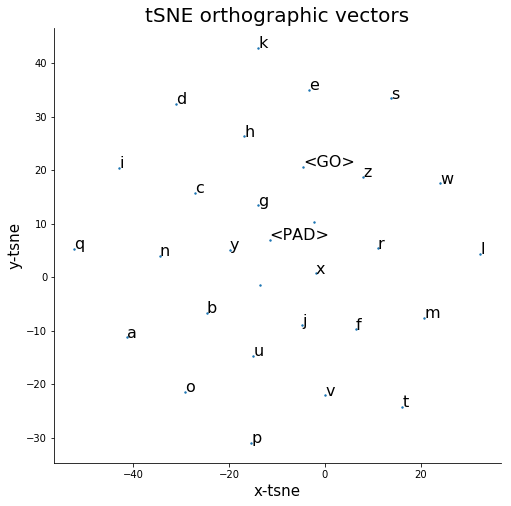

In [62]:
plot_tsne()

INFO:tensorflow:Restoring parameters from /Users/jannisborn/Dropbox/GitHub/LSTM/Models/childlex/normal_run_13/./my_test_model-499
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 30 samples in 0.000s...
[t-SNE] Computed neighbors for 30 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 30 / 30
[t-SNE] Mean sigma: 2.879913
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.308167
[t-SNE] Error after 1050 iterations: 1.111119
t-SNE done! Time elapsed: 0.34786009788513184 seconds
(30, 2)


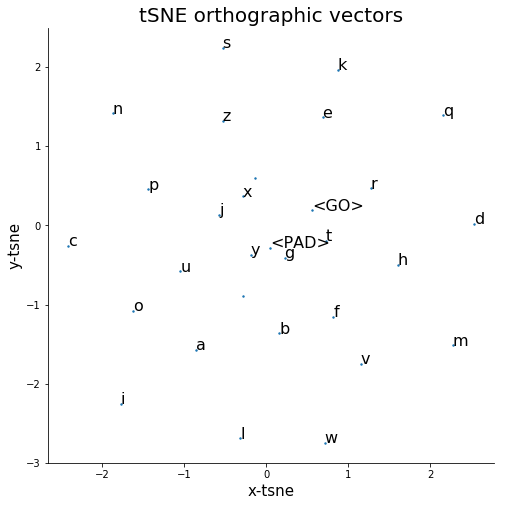

In [63]:
plot_tsne(perplexity=5,lr=1)

### READ IN MODEL AND DO A PREDICTION


In [2]:
path = '/Users/jannisborn/Dropbox/GitHub/LSTM/Models/childlex/'

ep = 499

ide =  'normal_run_13/'

with tf.Session() as sess:

    saver = tf.train.import_meta_graph(path+ide+'my_test_model-'+str(ep)+'.meta')
    saver.restore(sess,tf.train.latest_checkpoint(path+ide+'./'))


OSError: File /Users/jannisborn/Dropbox/GitHub/LSTM/Models/childlex/normal_run_13/my_test_model-499.meta does not exist.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
p = '/Users/jannisborn/Desktop/LDS_Data/TrainedModels/celex_all/normal_run_0/metrics.npz'

d = np.load(p)


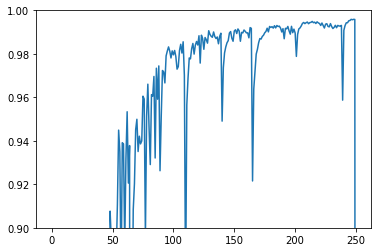

In [28]:
root = os.path.expanduser("~")+'/Desktop/LDS_Data/'
path = root + 'TrainedModels/childlex/normal_run_0'
epochs = 249
task = 'write'
mode = 'input'

with tf.Session() as sess:

			# Restore model
			saver = tf.train.import_meta_graph(path+'/my_test_model-'+str(epochs)+'.meta')
			saver.restore(sess,tf.train.latest_checkpoint(path+'/./'))
			graph = tf.get_default_graph()

			variable_path = self.model_name + '/encoding_' + self.task + '/enc_embedding:0'


			# Load data and perform PCA
			weight_vectors = sess.run(graph.get_tensor_by_name(variable_path))

0
